In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("1fXr31hcEemkYxLyQ1aU1g_50fc36ee697c4b158fe26ade3ec3bc24_Banknote-authentication-dataset-.csv")
df

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [4]:
df.shape

(1372, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1348, 2)

In [9]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1348 non-null   float64
 1   V2      1348 non-null   float64
dtypes: float64(2)
memory usage: 31.6 KB


In [11]:
df.describe()

,V1,V2
count,1348.000000,1348.000000
mean,0.445785,1.909039
std,2.862906,5.868600
min,-7.042100,-13.773100
25%,-1.786650,-1.627000
50%,0.518735,2.334150
75%,2.853250,6.796025
max,6.824800,12.951600


In [12]:
df.corr()

,V1,V2
V1,1.000000,0.272863
V2,0.272863,1.000000


<Axes: >

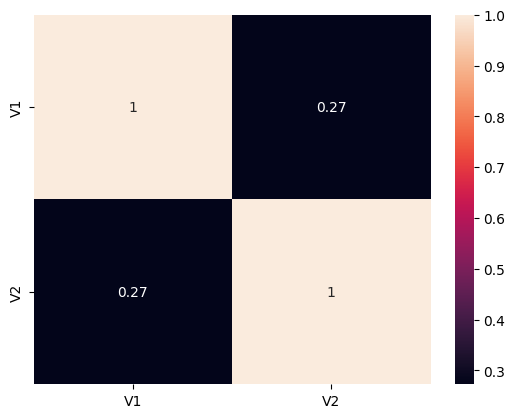

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

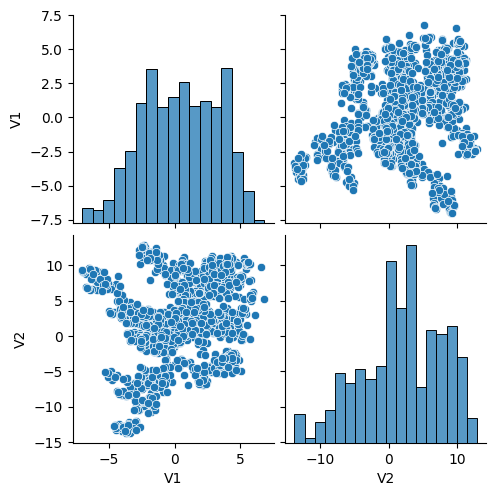

In [14]:
sns.pairplot(df)

In [15]:
v1 = np.array(df["V1"])
v2 = np.array(df["V2"])

In [16]:
V = np.column_stack((v1, v2))

In [17]:
mean_val = np.mean(V, 0)
mean_val

array([0.44578485, 1.9090393 ])

In [18]:
std_val = np.std(V, 0)
std_val

array([2.86184426, 5.86642289])

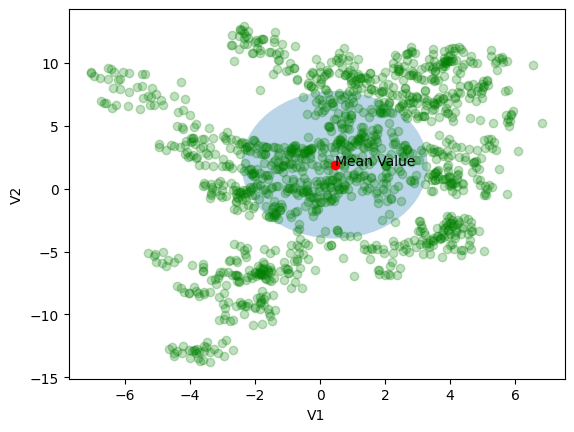

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig, graph = plt.subplots()
ellipse = patches.Ellipse([mean_val[0], mean_val[1]], std_val[0]*2, std_val[1]*2, alpha = 0.3)
graph.add_patch(ellipse)
graph.scatter(V[:, 0], V[:, 1], alpha = 0.25, color = "green")
graph.scatter(mean_val[0], mean_val[1], color = "red")
plt.text(mean_val[0], mean_val[1], "Mean Value")
plt.xlabel("V1")
plt.ylabel("V2")
plt.savefig("Mean value and overlay_banknote")
plt.show()

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["V1", "V2"]] = scaler.fit_transform(df[["V1", "V2"]])

In [23]:
k_range = range(1, 10)
sse = []

for k in k_range:
    mdl = KMeans(n_clusters=k)
    mdl.fit(df[["V1", "V2"]])
    sse.append(mdl.inertia_)

C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\si

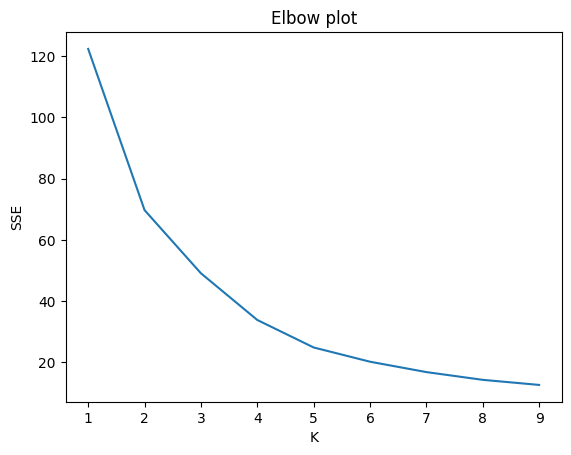

In [24]:
plt.plot(k_range, sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow plot")
plt.show()

We have elbow at 2

In [25]:
modl = KMeans(n_clusters=2)
modl.fit(df[["V1", "V2"]])

C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [26]:
predicted_y = modl.fit_predict(df[["V1", "V2"]])
predicted_y

C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 0, 0])

In [27]:
df["cluster"] = predicted_y
df

,V1,V2,cluster
0,0.769004,0.839643,1
1,0.835659,0.820982,1
2,0.786629,0.416648,1
3,0.757105,0.871699,1
4,0.531578,0.348662,0
...,...,...,...
1367,0.537124,0.565855,1
1368,0.407690,0.332868,0
1369,0.237385,0.011768,0
1370,0.250842,0.201701,0


In [28]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
cluster_centres = modl.cluster_centers_

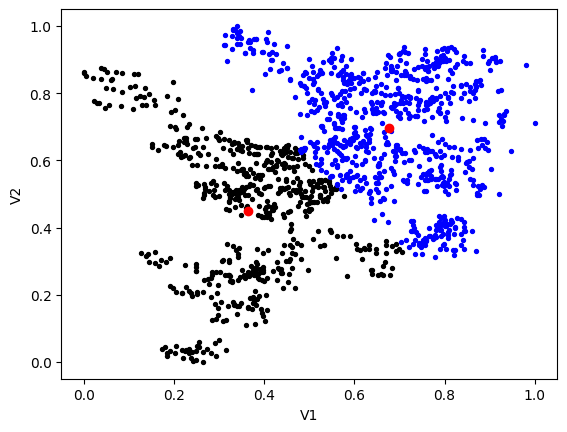

In [29]:
plt.scatter(df1["V1"], df1["V2"], color = 'black', s = 8)
plt.scatter(df2["V1"], df2["V2"], color = 'blue', s = 8)
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], color = "red")
plt.savefig("classified_banknotes")
plt.show()

In [30]:
count_df = df["cluster"].value_counts().reset_index().sort_values(["cluster"])
count_df

,cluster,count
1,0,592
0,1,756


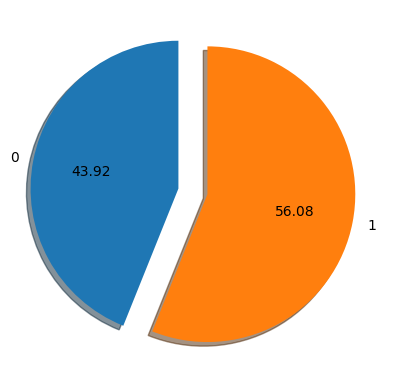

In [31]:
plt.pie(count_df["count"], labels = [0, 1], autopct = "%0.2f", startangle=90, shadow=True, explode=[0.2, 0])
plt.savefig("Pie chart banknotes")
plt.show()


In [32]:
cluster_centres

array([[0.36494033, 0.44807276],
       [0.67705275, 0.69543866]])

In [33]:
cluster_centres_df = pd.DataFrame(cluster_centres, columns=["V1_cluster_centre", "V2_cluster_centre"])
cluster_centres_df

,V1_cluster_centre,V2_cluster_centre
0,0.364940,0.448073
1,0.677053,0.695439


In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(V, predicted_y)

0.32247703726736926